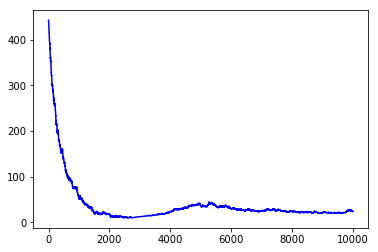

In [28]:
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np

gdmat = sio.loadmat('gradient_descent_data.mat')
A = gdmat['x']
b = gdmat['y']

def gradient_descent(A, b, total_step_count):
    initial_position = np.zeros([2, 1])  
    step_size =  0.005
    positions = compute_updates(A, b, initial_position, total_step_count, step_size)
    return positions

def compute_gradient(A, b, x):
    return (A*(A*x - b)) / np.linalg.norm(A*x - b)

def compute_update(A, b, x, step_size):
    return x - step_size * compute_gradient(A, b, x)

def compute_updates(A, b, p, total_step_count, step_size):
    positions = [np.array(p)]
    for k in range(total_step_count):
        index = int(1000 * np.random.rand())
        positions.append(compute_update(A[index], b[index], positions[-1], step_size))
    return positions

def mse(A, b, w):
    b_pred = np.dot(A, w)
    error = np.mean((b - b_pred)**2)
    return error

mse_errors = []
positions =  gradient_descent(A, b, 10000)

for w in positions:
    mse_errors.append(mse(A, b, w))

plt.plot(range(len(positions)), mse_errors, c='blue')
plt.plot()
plt.show()